# Задание

Даны две таблицы (выборки) - тренировочная и тестовая - с данными о пассажирах Титаника в формате .csv. Каждая строка = признаковое описание одного из пассажиров. Для тестовой выборки нужно предсказать, выжил ли пассажир - целевая переменная (колонка, target) "Survived".

- train.csv - данные для обучения модели, содержат колонку "Survived"
- test.csv - данные для которых нужно сделать предсказание, колонки с ответом не содержат

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
PATH_TO_TRAIN = r'C:/Users/Legion5Pro/Documents/Titanic/data_in/train.csv'
PATH_TO_TEST = r'C:/Users/Legion5Pro/Documents/Titanic/data_in/test.csv'

In [3]:
train = pd.read_csv(PATH_TO_TRAIN, index_col='PassengerId')
test = pd.read_csv(PATH_TO_TEST, index_col='PassengerId')

In [4]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### Видим, что в колонках Age, Cabin, Embarked - есть пропуски

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


### Удалим колонки, которые считаем ненужными

In [8]:
useless_columns = ['Name', 'Ticket', 'Cabin']

train_clean = train.drop(columns=useless_columns)
test_clean = test.drop(columns=useless_columns)

### Заполнение пропусков в данных

In [9]:
list(train.select_dtypes(include=['object']).columns.values)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [10]:
train['Age'].isnull().values.any()

True

In [11]:
def impute_data(df):
    
    df_copy = df.copy() #копируем, чтобы не изменять оригинал
    
    #заполняем пропущенные значения для категориальных переменных самым частым значением в колонке
    
    categorial_vars = list(df_copy.select_dtypes(include=['object']).columns.values) 
    #возвращает нам список названия колонок, где тип данных - object ->  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
    
    
    for col in categorial_vars:
        
        if (df_copy[col].isnull().values.any()): # возвращает нам True или False в зависимости, есть null в стобце или нет
            df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)
    
    
    
    #заполняем пропущенные значения для количественных переменных медианой по столбцу
    numerical_vars = list(df_copy.select_dtypes(include=['int64', 'float64']).columns.values)
    for col in numerical_vars:        
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].median(), inplace=True)

            
    return df_copy

In [12]:
train_full = impute_data(train_clean)
test_full = impute_data(test_clean)

### Проверям полученные данные

In [13]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [14]:
test_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


### Визуализация данных

По графикам ниже можно заметить:
- мужчины умирают гораздо чаще женщин
- бедные умирают чаще богатых

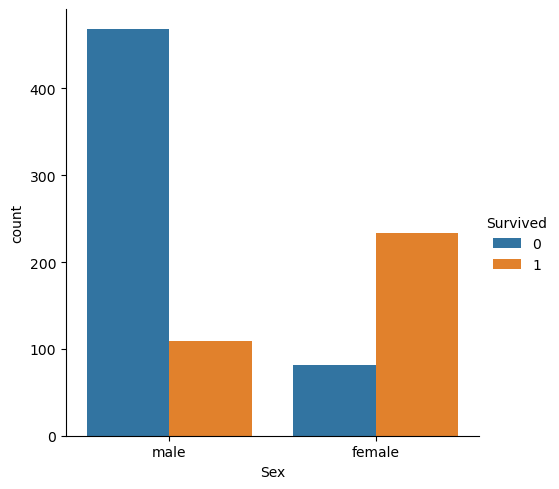

In [15]:
sns.catplot(data=train_full, x='Sex', hue='Survived', kind='count');
plt.show(1)

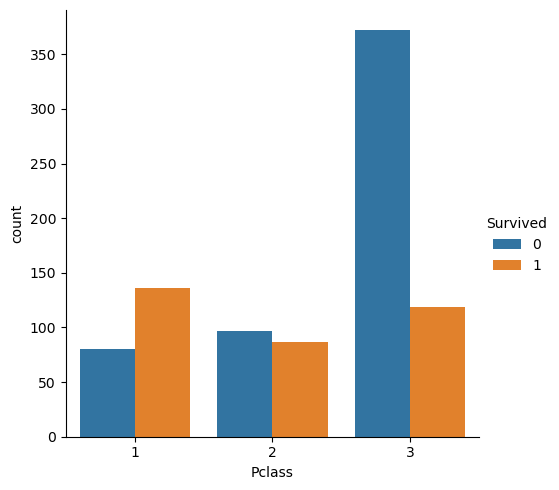

In [16]:
sns.catplot(data=train_full, x='Pclass',hue='Survived', kind='count');
plt.show(1)

### _Пассажиров, которые жили в третьей категории кают было больше всего_

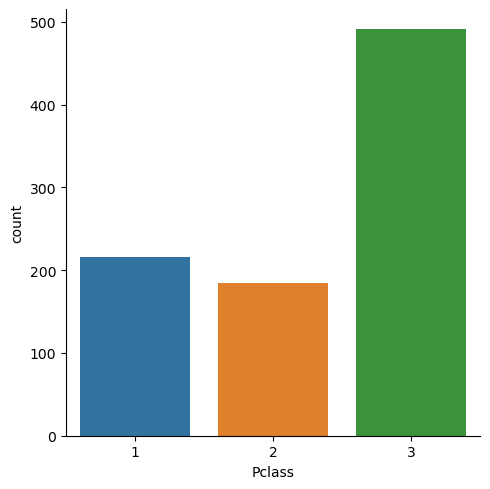

In [17]:
sns.catplot(data=train_full, x='Pclass', kind='count');
plt.show(1)

### _Бедных мужчин было больше всего_

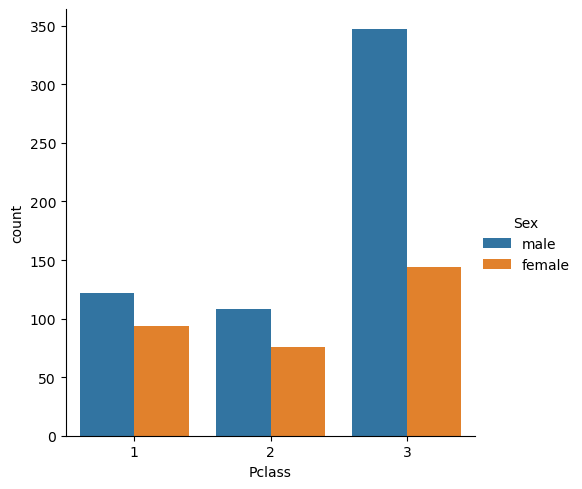

In [18]:
sns.catplot(data=train_full, x='Pclass', hue='Sex', kind='count');
plt.show(1)

### _Выживших мужчин среди 3 категории меньше всего_

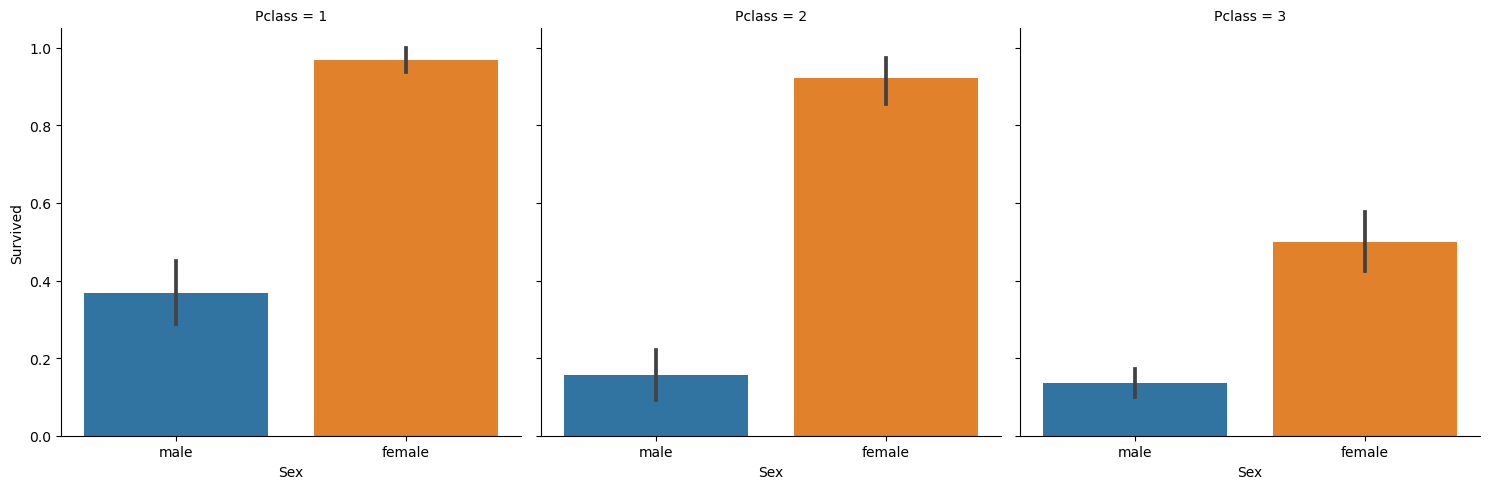

In [19]:
sns.catplot(x="Sex", y="Survived", col="Pclass", data=train_full, kind="bar");
plt.show(1)

### _Расмотрим, как влияло кол-во родственников на выживание_

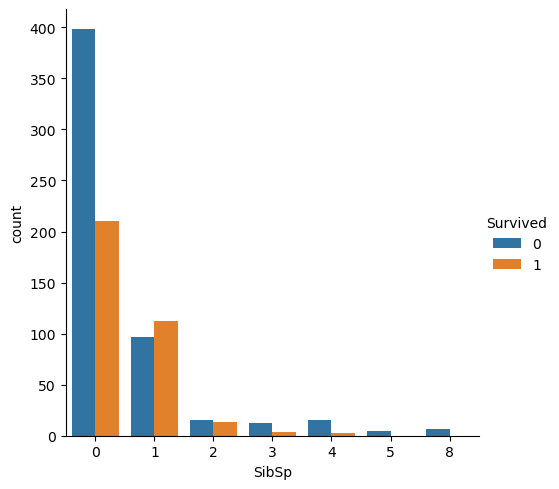

In [20]:
sns.catplot(data=train_full, x='SibSp', hue='Survived', kind='count');
plt.show(1);

#### _Видим, что в случаях 3 и 4 членов семьи  - выживала 1 семья из 3 и 4 соответсвенно,   5 и 8 членов - никто не выжил

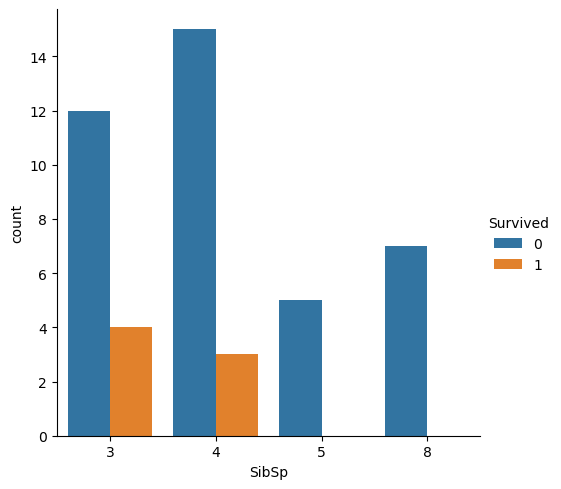

In [21]:
sns.catplot(data=train_full.query("SibSp > 2"), x='SibSp', hue='Survived', kind='count');
plt.show(1);

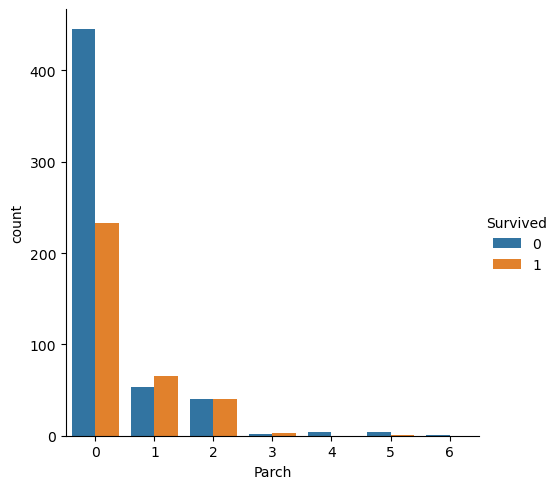

In [22]:
sns.catplot(data=train_full, x='Parch', hue='Survived', kind='count');
plt.show(1);

In [23]:
train_full.to_csv(r'C:/Users/Legion5Pro/Documents/Titanic/data_out/train_imputed.csv')
test_full.to_csv(r'C:/Users/Legion5Pro/Documents/Titanic/data_out/test_imputed.csv')

# Обучение

In [24]:
y_train = train_full['Survived']
train_sep = train_full.drop(columns=['Survived'])

In [25]:
#One-hot-encoding категориальных переменных

def encode_categorical(df_train, df_test):
    
    test_start_ind = df_train.index[-1] #запомнили индекс, с которого начинаются тестовые данные
    
    concated_df = pd.concat([df_train, df_test], sort=False) #объединили обучающую выборку с тестовой, для корректности
                                                             #преобразования
        
    encoded_df = pd.get_dummies(concated_df, drop_first=True)#преобразовали
    
    
    df_train_encoded, df_test_encoded = encoded_df.iloc[:test_start_ind, :], encoded_df.iloc[test_start_ind:, :] #разъединили
    
    return df_train_encoded, df_test_encoded

In [26]:
X_train, X_test = encode_categorical(train_sep, test_full)

In [27]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1,0,1
2,1,38.0,1,0,71.2833,0,0,0
3,3,26.0,0,0,7.9250,0,0,1
4,1,35.0,1,0,53.1000,0,0,1
5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,1,0,1
888,1,19.0,0,0,30.0000,0,0,1
889,3,28.0,1,2,23.4500,0,0,1


In [28]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,0
893,3,47.0,1,0,7.0000,0,0,1
894,2,62.0,0,0,9.6875,1,1,0
895,3,27.0,0,0,8.6625,1,0,1
896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
1305,3,27.0,0,0,8.0500,1,0,1
1306,1,39.0,0,0,108.9000,0,0,0
1307,3,38.5,0,0,7.2500,1,0,1


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 44.4 KB


In [30]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_male    418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt_clf = DecisionTreeClassifier()

In [33]:
%%time

dt_clf.fit(X_train, y_train) #обучение

Wall time: 2.74 ms


DecisionTreeClassifier()

In [34]:
pred_dt_simple = dt_clf.predict(X_test)

In [35]:
from sklearn.tree import export_graphviz
from IPython.display import Image, display


def visualize_tree(clf, X, file_name):
    
    export_graphviz(clf, feature_names=X.columns, out_file=file_name + '.dot', filled=True)
    
    #при помощи восклицательного знака можно вызвать терминал
    !dot -Tpng {file_name}.dot -o {file_name}.png
    
    display(Image(filename=file_name + '.png'))

### Визуализация

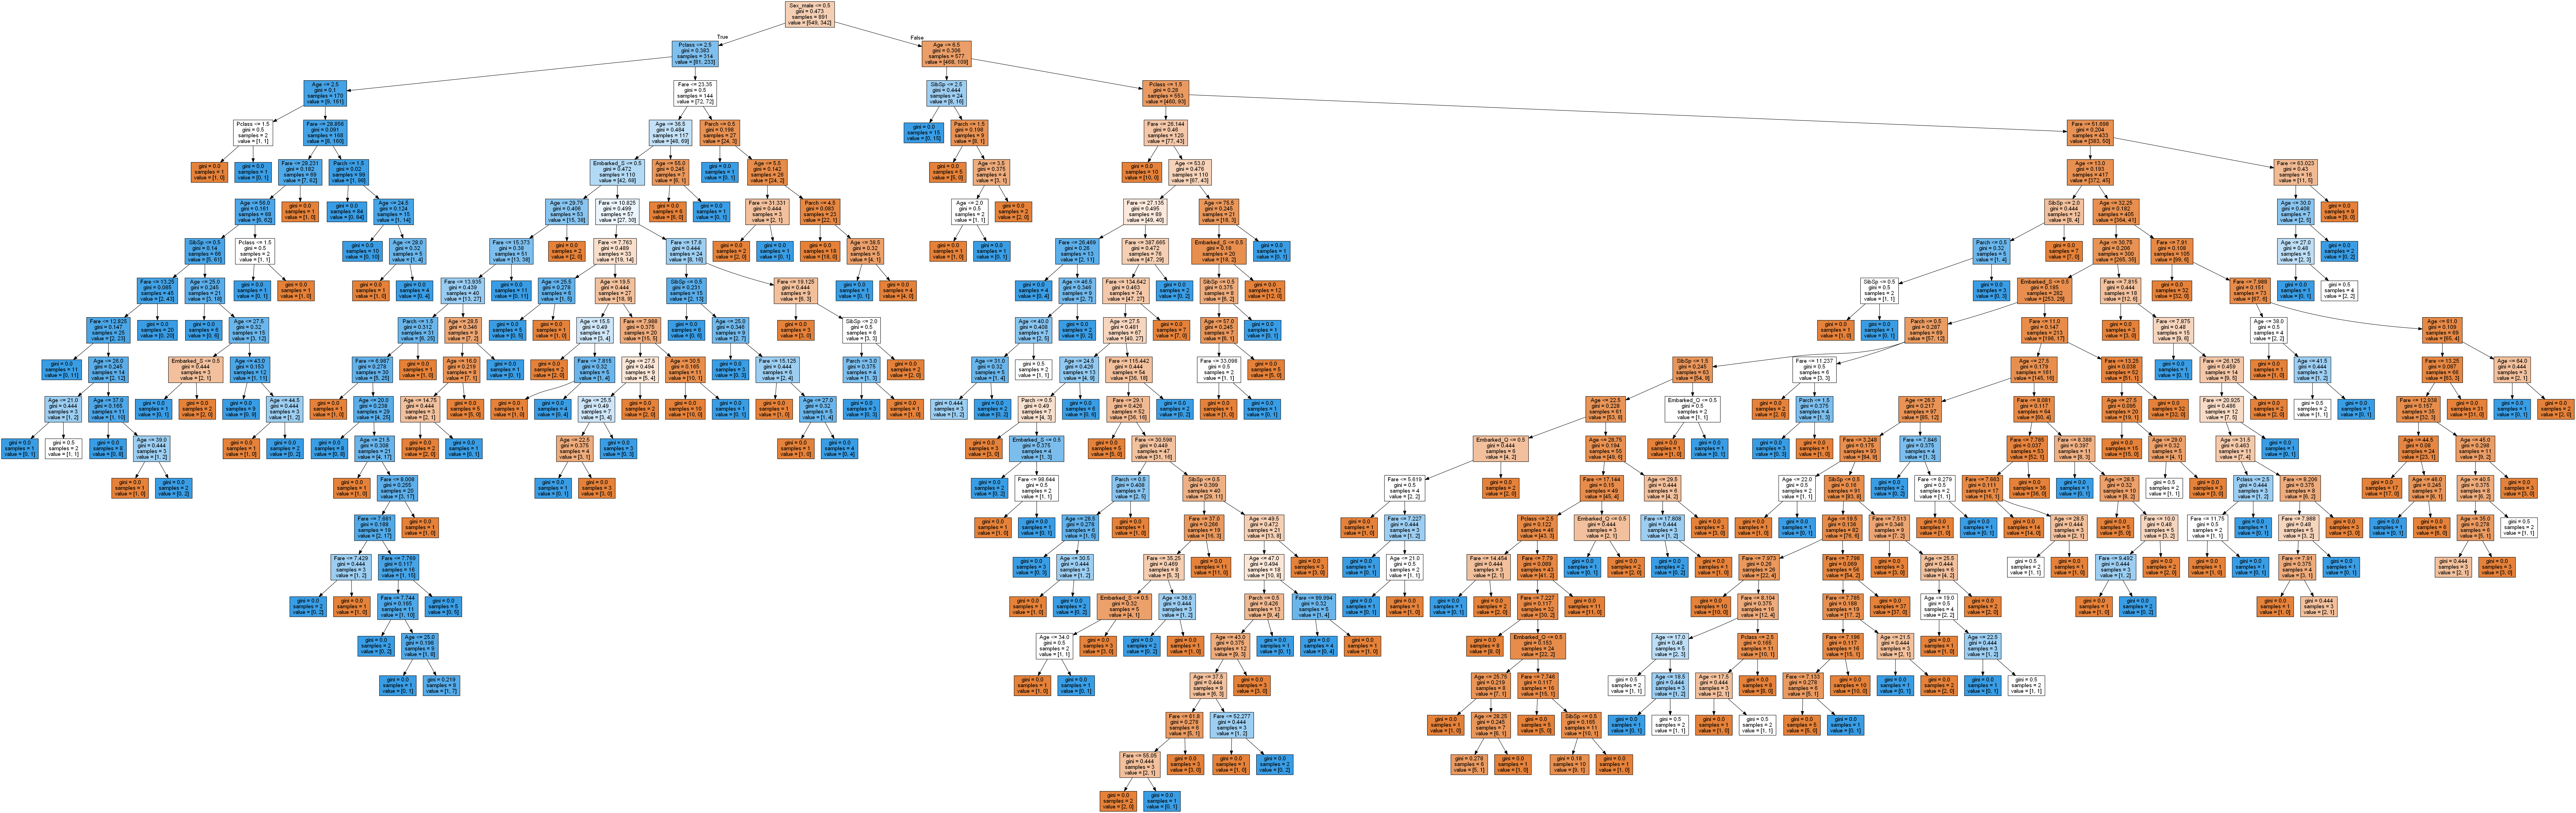

In [36]:
visualize_tree(dt_clf, X_train, 'tree');

In [37]:
#функция для составления submission-файла соревнования

def make_prediction_file(prediction, test_data, name):
    
    result = pd.DataFrame({'PassengerId': test_data.reset_index()['PassengerId'], "Survived": prediction})  
    result.to_csv(name, index=False)

In [38]:
make_prediction_file(pred_dt_simple, test, './Result/titanic_dt_simple.csv')

#### Результат на https://www.kaggle.com/

![dt_simple.png](./Screenshots/dt_simple.png)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
random_grid_cv = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [41]:
%%time

random_grid_cv.fit(X_train, y_train)

Wall time: 68.7 ms


RandomForestClassifier(max_depth=5, random_state=1)

In [42]:
rand_grid_pred = random_grid_cv.predict(X_test)

In [43]:
make_prediction_file(rand_grid_pred, test, './Result/titanic_dt_rand.csv')

#### Результат на https://www.kaggle.com
![dt_random.png](./Screenshots/dt_random.png)